In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
oneplusnord_reviews = []

In [3]:
for i in range (1,30):
    ip=[]
    url = 'https://www.amazon.in/OnePlus-Nord-Marble-128GB-Storage/product-reviews/B086977J3K/ref=cm_cr_getr_d_paging_btm_prev_1?pageNumber='+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    oneplusnord_reviews = oneplusnord_reviews+ip

In [4]:
oneplusnord_reviews

['\n\n  Display has green tint issue..display looks like a very cheap quality phone. Want to return the phone but amazon is not offering return on this phone.\n\n',
 '\n\n  ProSmooth OS - no lags at allAMOLED screen is good quality screenPrivacy - no useless apps like those found in chinese phonesAll other pros we would expect for these specs - no deviationsConNot a metal frameCPU is slower compared to current 865 flagships (this is expecetd)Note: I am releived the display is fine at low brightness - I read  some users sharing the green tint issue.  I did not face that yet.  Will update reviews in case of any issues.\n\n',
 '\n\n  I used several phone except like this type of phone but this phone is very silky smoothy.90hz refresh rate speed is very good or smooth like an iPhone 11.the keypad touch was also very smooth.audio is mono speaker only but it is also good audiable(something missing in the speaker).the camera is fair.i think next update this camera quality also increase.this p

In [5]:
rev_string = ' '.join(oneplusnord_reviews)

In [6]:
rev_string = re.sub("[^A-Za-z" "]+"," ",rev_string).lower()

In [7]:
rev_string

' display has green tint issue display looks like a very cheap quality phone want to return the phone but amazon is not offering return on this phone prosmooth os no lags at allamoled screen is good quality screenprivacy no useless apps like those found in chinese phonesall other pros we would expect for these specs no deviationsconnot a metal framecpu is slower compared to current flagships this is expecetd note i am releived the display is fine at low brightness i read some users sharing the green tint issue i did not face that yet will update reviews in case of any issues i used several phone except like this type of phone but this phone is very silky smoothy hz refresh rate speed is very good or smooth like an iphone the keypad touch was also very smooth audio is mono speaker only but it is also good audiable something missing in the speaker the camera is fair i think next update this camera quality also increase this phone very very user friendly wrap charging is minute time take 

In [8]:
rev_words = rev_string.split(" ")

In [9]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [10]:
rev_words = [i for i in rev_words if not i in stopwords]

In [11]:
rev_string = ' '.join(rev_words)

In [12]:
from nltk import tokenize
reviews = tokenize.sent_tokenize(''.join(oneplusnord_reviews))

In [13]:
reviews[3:10]

['I did not face that yet.',
 'Will update reviews in case of any issues.',
 'I used several phone except like this type of phone but this phone is very silky smoothy.90hz refresh rate speed is very good or smooth like an iPhone 11.the keypad touch was also very smooth.audio is mono speaker only but it is also good audiable(something missing in the speaker).the camera is fair.i think next update this camera quality also increase.this phone very very user-friendly .wrap charging is 30 minute time take 0 to 65% charge completed that was very excited.the  I appreciated OnePlus company because of less price for nord.',
 "don't go on brand name and look.",
 'very bad camera.',
 'i have vivo z1 pro and believe me it was clicking better picture than one plus nord and vivo is only for 18k.',
 'one plus is now conning the buyers and breaking their trust.']

In [28]:
!pip install wordcloud

In [30]:
from wordcloud import WordCloud

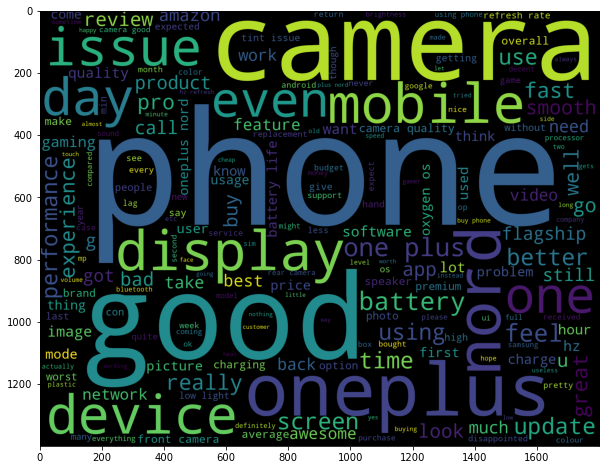

In [31]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(rev_string)

plt.figure(figsize=(20,8))
plt.imshow(wordcloud_ip)
plt.show()

In [14]:
sent_df = pd.DataFrame(reviews,columns=['sentance'])
sent_df

,sentance
0,\n\n Display has green tint issue..display lo...
1,Want to return the phone but amazon is not off...
2,ProSmooth OS - no lags at allAMOLED screen is ...
3,I did not face that yet.
4,Will update reviews in case of any issues.
...,...
1612,OnePlus finally achieved in fraud activities.
1613,I paid 30 k for this fake camera phone.
1614,One plus brand is now a fake brand on goin lat...
1615,With video.


In [15]:
afinn = pd.read_csv("C:\\Users\\91999\\Downloads\\Afinn.csv")
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [16]:
afinn.shape

(2477, 2)

In [17]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [18]:
import spacy

In [19]:
nlp = spacy.load('en_core_web_sm')
sentiment = affinity_scores

def sentiment_cal(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment.get(word.lemma_, 0)
    return sent_score

In [20]:
sentiment_cal('i am excited')

3

In [21]:
sent_df['sentimental_value']=sent_df['sentance'].apply(sentiment_cal)

In [22]:
sent_df

,sentance,sentimental_value
0,\n\n Display has green tint issue..display lo...,2
1,Want to return the phone but amazon is not off...,1
2,ProSmooth OS - no lags at allAMOLED screen is ...,5
3,I did not face that yet.,0
4,Will update reviews in case of any issues.,0
...,...,...
1612,OnePlus finally achieved in fraud activities.,-4
1613,I paid 30 k for this fake camera phone.,-4
1614,One plus brand is now a fake brand on goin lat...,-8
1615,With video.,0


In [23]:
sent_df['word_count'] = sent_df['sentance'].str.split().apply(len)

In [24]:
sent_df

,sentance,sentimental_value,word_count
0,\n\n Display has green tint issue..display lo...,2,12
1,Want to return the phone but amazon is not off...,1,14
2,ProSmooth OS - no lags at allAMOLED screen is ...,5,66
3,I did not face that yet.,0,6
4,Will update reviews in case of any issues.,0,8
...,...,...,...
1612,OnePlus finally achieved in fraud activities.,-4,6
1613,I paid 30 k for this fake camera phone.,-4,9
1614,One plus brand is now a fake brand on goin lat...,-8,41
1615,With video.,0,2


In [25]:
sent_df[sent_df['sentimental_value']>=0]

,sentance,sentimental_value,word_count
0,\n\n Display has green tint issue..display lo...,2,12
1,Want to return the phone but amazon is not off...,1,14
2,ProSmooth OS - no lags at allAMOLED screen is ...,5,66
3,I did not face that yet.,0,6
4,Will update reviews in case of any issues.,0,8
...,...,...,...
1607,"*It has a open ""allow access"" system which I l...",3,112
1608,Tnagar..I recommend you to use the back case g...,2,13
1610,Now that is the reason recent nord is launched...,0,14
1615,With video.,0,2


In [26]:
sent_df[sent_df['sentimental_value']<0]

,sentance,sentimental_value,word_count
7,very bad camera.,-3,3
11,It's very poor phone company lair battery char...,-2,19
14,My iphone 6 and oneplus 3 have a better panel ...,-1,26
20,Screen refresh rate of 90hz but due to less pr...,-2,18
28,No seal on box.,-1,4
...,...,...,...
1609,Nord shows 4 camera lens and two of those bott...,-5,36
1611,Had seen a video in YouTube in which a guy rem...,-3,22
1612,OnePlus finally achieved in fraud activities.,-4,6
1613,I paid 30 k for this fake camera phone.,-4,9


C:\Users\91999\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


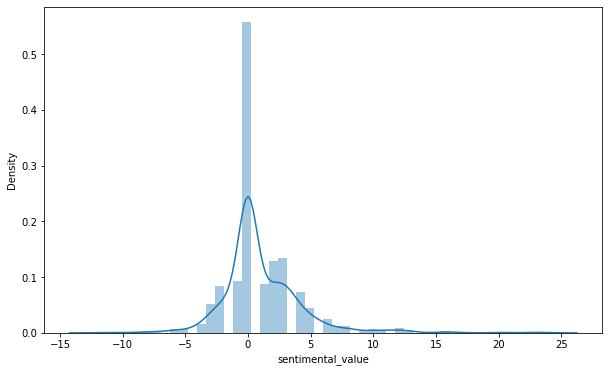

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.distplot(sent_df['sentimental_value'])
plt.show()